In [25]:
#https://www.kaggle.com/akashsri99/deep-learning-iris-dataset-keras/notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical
import seaborn as sns


In [26]:
dataset = pd.read_csv('data-filtered.csv',sep=';')
dataset.head(10)

,label,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_SP_OPS,PAPI_L2_LDM,PAPI_L2_STM,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_TLB_DM,PAPI_L1_LDM,PAPI_L1_STM,PAPI_BR_MSP,PAPI_LD_INS,PAPI_SR_INS,PAPI_FP_OPS
0,Copy_E,7506202,7251678,155067091,690505578,0,1968278,1126838,8648,31558008,31110445,2482,2036791,1293163,26500,30635769,30029983,110
1,Copy_E,7504688,7260677,155790679,680995908,0,1974449,1119447,8294,32181036,31412934,2110,2037548,1291670,25639,30983539,30028664,45
2,Copy_E,7504747,7260607,156006342,681351624,0,1973728,1129275,8302,31976476,31313451,2044,2037154,1288532,25548,30818212,30028664,48
3,Copy_E,7504614,7262252,155759501,680590152,0,1972313,1128913,8331,32033177,31339910,2102,2039808,1292228,26387,30840624,30028663,45
4,Copy_E,7504705,7262368,156058057,681123348,0,1972771,1123978,8375,32038073,31343329,2107,2036957,1289763,25240,30848798,30028664,45
5,Copy_E,7504719,7261154,155874805,680788152,0,1974815,1125201,8330,32023300,31342198,2054,2039389,1299095,26353,30918907,30028663,48
6,Copy_E,7504576,7261112,155682200,680568966,0,1974611,1130230,8295,31916512,31277422,2146,2041616,1295927,25359,30932358,30028664,48
7,Copy_E,7504493,7259396,156095445,681221592,0,1975070,1127729,8277,31993608,31323273,2124,2042191,1297945,25404,30995652,30028665,45
8,Copy_E,7504545,7258906,156334858,681790158,0,1978406,1128802,8335,31888690,31263503,2136,2041003,1295410,26224,30801924,30028665,47
9,Copy_E,7504515,7261062,155960642,680998932,0,1975303,1118837,8335,31989769,31315528,2117,2038916,1293492,25314,31058748,30028662,48


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008000 entries, 0 to 1007999
Data columns (total 18 columns):
label           1008000 non-null object
PAPI_L1_DCM     1008000 non-null int64
PAPI_L3_TCM     1008000 non-null int64
PAPI_TOT_INS    1008000 non-null int64
PAPI_REF_CYC    1008000 non-null int64
PAPI_SP_OPS     1008000 non-null int64
PAPI_L2_LDM     1008000 non-null int64
PAPI_L2_STM     1008000 non-null int64
PAPI_BR_UCN     1008000 non-null int64
PAPI_BR_CN      1008000 non-null int64
PAPI_BR_TKN     1008000 non-null int64
PAPI_TLB_DM     1008000 non-null int64
PAPI_L1_LDM     1008000 non-null int64
PAPI_L1_STM     1008000 non-null int64
PAPI_BR_MSP     1008000 non-null int64
PAPI_LD_INS     1008000 non-null int64
PAPI_SR_INS     1008000 non-null int64
PAPI_FP_OPS     1008000 non-null int64
dtypes: int64(17), object(1)
memory usage: 138.4+ MB


In [28]:
y = dataset.iloc[:,0].values
print(y)
del dataset['label']

['Copy_E' 'Copy_E' 'Copy_E' ... '2PStencil_E' '2PStencil_E' '2PStencil_E']


In [29]:
dataset = dataset.reindex_axis(sorted(dataset.columns), axis=1)
dataset

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,PAPI_BR_CN,PAPI_BR_MSP,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_FP_OPS,PAPI_L1_DCM,PAPI_L1_LDM,PAPI_L1_STM,PAPI_L2_LDM,PAPI_L2_STM,PAPI_L3_TCM,PAPI_LD_INS,PAPI_REF_CYC,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_DM,PAPI_TOT_INS
0,31558008,26500,31110445,8648,110,7506202,2036791,1293163,1968278,1126838,7251678,30635769,690505578,0,30029983,2482,155067091
1,32181036,25639,31412934,8294,45,7504688,2037548,1291670,1974449,1119447,7260677,30983539,680995908,0,30028664,2110,155790679
2,31976476,25548,31313451,8302,48,7504747,2037154,1288532,1973728,1129275,7260607,30818212,681351624,0,30028664,2044,156006342
3,32033177,26387,31339910,8331,45,7504614,2039808,1292228,1972313,1128913,7262252,30840624,680590152,0,30028663,2102,155759501
4,32038073,25240,31343329,8375,45,7504705,2036957,1289763,1972771,1123978,7262368,30848798,681123348,0,30028664,2107,156058057
5,32023300,26353,31342198,8330,48,7504719,2039389,1299095,1974815,1125201,7261154,30918907,680788152,0,30028663,2054,155874805
6,31916512,25359,31277422,8295,48,7504576,2041616,1295927,1974611,1130230,7261112,30932358,680568966,0,30028664,2146,155682200
7,31993608,25404,31323273,8277,45,7504493,2042191,1297945,1975070,1127729,7259396,30995652,681221592,0,30028665,2124,156095445
8,31888690,26224,31263503,8335,47,7504545,2041003,1295410,1978406,1128802,7258906,30801924,681790158,0,30028665,2136,156334858
9,31989769,25314,31315528,8335,48,7504515,2038916,1293492,1975303,1118837,7261062,31058748,680998932,0,30028662,2117,155960642


In [30]:
X = dataset.values
print(X)

[[ 31558008     26500  31110445 ...  30029983      2482 155067091]
 [ 32181036     25639  31412934 ...  30028664      2110 155790679]
 [ 31976476     25548  31313451 ...  30028664      2044 156006342]
 ...
 [   875239      1261    489122 ...     33440        45   3988360]
 [   860663      1288    483231 ...     33439        46   3998422]
 [   893786      1349    497225 ...     33439        49   4064381]]


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(X)
X_scaled =  scaler_x.transform(X)
#print (X_scaled)

c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_enc = encoder.fit_transform(y)
#print(y1)
Y = pd.get_dummies(y_enc).values
#print(Y)

In [33]:
encoder.inverse_transform([0,1,2,3,4,5])

array(['2PStencil_E', 'Add_E', 'Copy_E', 'Reduction_E', 'Scale_E',
       'Triad_E'], dtype=object)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0) 

In [35]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD,Adam


model = Sequential()

In [36]:
model.add(Dense(40,input_shape=(17,),activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(20,activation='tanh'))
model.add(Dense(6,activation='softmax'))

In [37]:
model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 40)                720       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2050      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 126       
Total params: 3,916
Trainable params: 3,916
Non-trainable params: 0
_________________________________________________________________


In [39]:
#fitting the model and predicting 
history = model.fit(X_scaled,Y,batch_size=100,epochs=100,shuffle=1,validation_split=0.20)

Train on 806400 samples, validate on 201600 samples
Epoch 1/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.5467 - acc: 0.7933 - val_loss: 0.5857 - val_acc: 0.7811
Epoch 2/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.2984 - acc: 0.8897 - val_loss: 0.3584 - val_acc: 0.8850
Epoch 3/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.2253 - acc: 0.9162 - val_loss: 0.3034 - val_acc: 0.8772
Epoch 4/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.1908 - acc: 0.9278 - val_loss: 0.2950 - val_acc: 0.8821
Epoch 5/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.1703 - acc: 0.9357 - val_loss: 0.2492 - val_acc: 0.8965
Epoch 6/100
806400/806400 [==============================] - 6s 7us/step - loss: 0.1538 - acc: 0.9420 - val_loss: 0.2221 - val_acc: 0.9189
Epoch 7/100
806400/806400 [==============================] - 6s 7us/step - loss: 0.1425 - acc: 0.9457 - val_loss: 

806400/806400 [==============================] - 6s 7us/step - loss: 0.0476 - acc: 0.9814 - val_loss: 0.4227 - val_acc: 0.8578
Epoch 60/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.0477 - acc: 0.9814 - val_loss: 0.1267 - val_acc: 0.9481
Epoch 61/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.0465 - acc: 0.9817 - val_loss: 0.2471 - val_acc: 0.9065
Epoch 62/100
806400/806400 [==============================] - 6s 7us/step - loss: 0.0484 - acc: 0.9816 - val_loss: 0.1009 - val_acc: 0.9579
Epoch 63/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.0476 - acc: 0.9815 - val_loss: 0.1334 - val_acc: 0.9491
Epoch 64/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.0466 - acc: 0.9820 - val_loss: 0.1757 - val_acc: 0.9223
Epoch 65/100
806400/806400 [==============================] - 6s 8us/step - loss: 0.0471 - acc: 0.9816 - val_loss: 0.1407 - val_acc: 0.9408
Epoch 66/100
806400/806400 [=====

In [40]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     33409
           1       0.90      0.97      0.93     33598
           2       0.93      1.00      0.96     33693
           3       1.00      0.98      0.99     33665
           4       1.00      0.95      0.98     33546
           5       0.91      0.95      0.93     33689

   micro avg       0.95      0.95      0.95    201600
   macro avg       0.96      0.95      0.95    201600
weighted avg       0.96      0.95      0.95    201600

[[28897  1156   165     0    19  3172]
 [    0 32534  1039     0    25     0]
 [    0     1 33692     0     0     0]
 [    0    60   523 33082     0     0]
 [    0   715   802     0 32028     1]
 [    0  1568    23     0     8 32090]]


In [41]:
history.history

{'val_loss': [0.5857268522807842,
  0.35837317527665835,
  0.3034211271456558,
  0.29497963380393616,
  0.24917722811879112,
  0.2220572320095662,
  0.4707828634456261,
  0.2503278632835066,
  0.26132169858818044,
  0.24915011224104164,
  0.20583579706324562,
  0.4797813664434162,
  0.17485728399007233,
  0.14986848992978133,
  0.2556958146738525,
  0.48859726181926855,
  0.14850759981066847,
  0.14498871588616383,
  0.24512155992616036,
  0.12274701019828128,
  0.2410783934412596,
  0.2027260819150643,
  1.254678278128023,
  0.16410121909452355,
  0.23119131476230906,
  0.1647429112001677,
  0.28223642850697267,
  0.2041555158139438,
  0.2259264077911516,
  0.1596392265659443,
  0.2007983843380216,
  0.29389375663879186,
  0.23690319417352904,
  0.38729105407907094,
  0.19135006707193877,
  0.2608989039299071,
  0.175189052794817,
  0.1904154228002576,
  0.21735757725840377,
  0.21190692454986493,
  0.33084416627789864,
  0.24163785415950922,
  0.2448282080039381,
  0.2239504641376729

[12.0, 8.0]


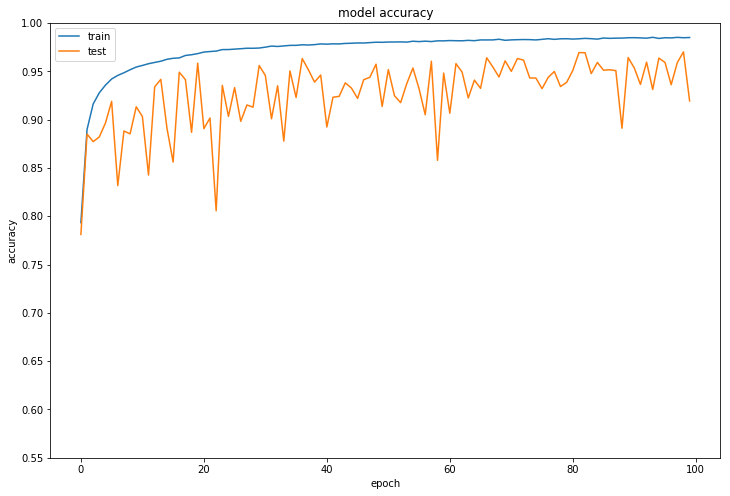

In [42]:
#print(history.history.keys())
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size=[12.0,8.0]
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0.55,1)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


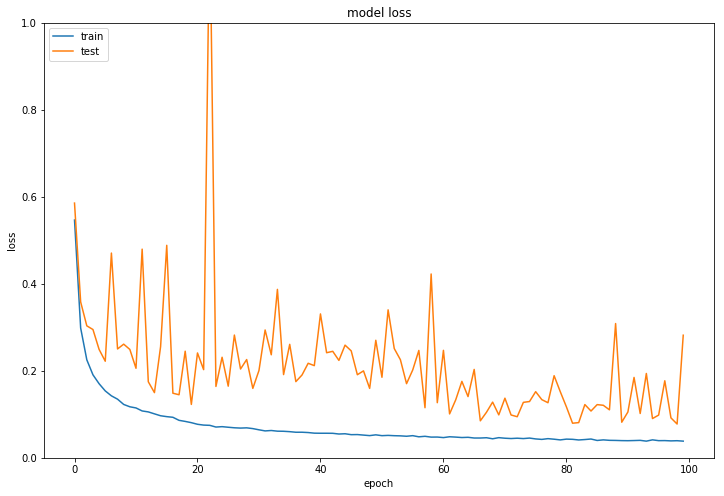

In [43]:
plt.ylim(0.0,1)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
model.save('my_model.h5')
#mode.load('my_model.h5')

In [45]:
dataset_pred_in = pd.read_csv('nofusion-data-partial.csv',sep=';')
del dataset_pred_in['id']
del dataset_pred_in['size vector']
del dataset_pred_in['comp opt']
#Scale_E

In [46]:
dataset_pred = dataset_pred_in[dataset_pred_in.label ==  'Reduction_E']

In [47]:
dataset_pred.head(10)

,label,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_SP_OPS,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM
1,Reduction_E,4441,169,4183584,7579476,1309,139404,25266,950715,554198,1933,8555,3635,417,8489,786670,131,69
3,Reduction_E,3786,142,3981145,7228458,840,139392,25432,1014249,588770,2027,8563,3222,428,8496,786320,155,48
5,Reduction_E,3653,135,4005842,7270740,799,139400,25282,904700,533860,1795,8567,3448,451,8491,783945,145,51
7,Reduction_E,3681,118,3944949,7142940,747,139395,25422,895989,528618,1821,8568,3292,436,8490,770757,140,46
9,Reduction_E,3541,122,3926286,7114014,732,139396,25355,935496,548681,1828,8565,3306,432,8538,802356,190,45
11,Reduction_E,3682,128,3934386,7116210,772,139389,25276,908129,534273,1776,8555,3255,435,8491,784998,174,50
13,Reduction_E,3607,131,3960902,7191576,823,139392,25220,893801,526681,1765,8560,3437,447,8497,773812,140,40
15,Reduction_E,3635,128,3958456,7155882,749,139392,25271,946453,555024,1831,8566,3327,442,8497,767839,158,46
17,Reduction_E,3670,124,3912229,7095654,729,139392,25258,906431,533520,1778,8569,3303,435,8499,772006,141,45
19,Reduction_E,3812,126,4012266,7269624,778,139389,25260,897043,529072,1795,8573,3366,442,8494,790018,150,40


In [48]:
#dataset_pred.info()

In [49]:
y_pred = dataset_pred.iloc[:,0].values
print(y_pred)
del dataset_pred['label']

['Reduction_E' 'Reduction_E' 'Reduction_E' ... 'Reduction_E' 'Reduction_E'
 'Reduction_E']


In [50]:
dataset_pred = dataset_pred.reindex_axis(sorted(dataset_pred.columns), axis=1)
dataset_pred

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,PAPI_BR_CN,PAPI_BR_MSP,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_FP_OPS,PAPI_L1_DCM,PAPI_L1_LDM,PAPI_L1_STM,PAPI_L2_LDM,PAPI_L2_STM,PAPI_L3_TCM,PAPI_LD_INS,PAPI_REF_CYC,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_DM,PAPI_TOT_INS
1,950715,1933,554198,25266,8555,4441,3635,417,1309,131,169,786670,7579476,8489,139404,69,4183584
3,1014249,2027,588770,25432,8563,3786,3222,428,840,155,142,786320,7228458,8496,139392,48,3981145
5,904700,1795,533860,25282,8567,3653,3448,451,799,145,135,783945,7270740,8491,139400,51,4005842
7,895989,1821,528618,25422,8568,3681,3292,436,747,140,118,770757,7142940,8490,139395,46,3944949
9,935496,1828,548681,25355,8565,3541,3306,432,732,190,122,802356,7114014,8538,139396,45,3926286
11,908129,1776,534273,25276,8555,3682,3255,435,772,174,128,784998,7116210,8491,139389,50,3934386
13,893801,1765,526681,25220,8560,3607,3437,447,823,140,131,773812,7191576,8497,139392,40,3960902
15,946453,1831,555024,25271,8566,3635,3327,442,749,158,128,767839,7155882,8497,139392,46,3958456
17,906431,1778,533520,25258,8569,3670,3303,435,729,141,124,772006,7095654,8499,139392,45,3912229
19,897043,1795,529072,25260,8573,3812,3366,442,778,150,126,790018,7269624,8494,139389,40,4012266


In [51]:
X_pred = dataset_pred.values
print(X_pred)

[[ 950715    1933  554198 ...  139404      69 4183584]
 [1014249    2027  588770 ...  139392      48 3981145]
 [ 904700    1795  533860 ...  139400      51 4005842]
 ...
 [ 849752    1471  474778 ...   28284      42 3377070]
 [ 889704    1532  493891 ...   28298      27 3458739]
 [ 850512    1460  474704 ...   28272      28 3381361]]


In [52]:
X_pred_scaled = scaler_x.fit_transform(X_pred)

c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
predictions = model.predict_classes(X_pred_scaled)
predictions

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [54]:
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [55]:
predictioni_ = encoder.inverse_transform(prediction_)
predictioni_


array(['Copy_E', 'Copy_E', 'Copy_E', ..., 'Copy_E', 'Copy_E', 'Copy_E'],
      dtype=object)

In [56]:
func_vec = ['2PStencil_E', 'Add_E', 'Copy_E', 'Reduction_E', 'Scale_E','Triad_E']
pred_vec= [0]*6
print(pred_vec)
for i in prediction_:
    pred_vec[i] = pred_vec[i] + 1
print(pred_vec)

[0, 0, 0, 0, 0, 0]
[10, 3545, 64299, 12811, 1930, 25405]


In [57]:
total = sum(pred_vec)
for i in range(6):
    print("Predicted {} \t {}%".format(func_vec[i],pred_vec[i]*100/total))

Predicted 2PStencil_E 	 0.009259259259259259%
Predicted Add_E 	 3.2824074074074074%
Predicted Copy_E 	 59.53611111111111%
Predicted Reduction_E 	 11.862037037037037%
Predicted Scale_E 	 1.787037037037037%
Predicted Triad_E 	 23.52314814814815%


In [58]:
dataset_pred = dataset_pred_in[dataset_pred_in.label ==  '2PStencil_E']
dataset_pred.head(10)

,label,PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_SP_OPS,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM
0,2PStencil_E,11404,2270,21357174,41445738,6842,163266,26928,6803526,3478444,4623,34182,8620,1505,33904,3228032,1155,1296
2,2PStencil_E,3918,112,4282563,7271280,681,156346,25087,909340,530386,1822,33952,3250,773,33871,1427920,327,51
4,2PStencil_E,3831,96,4273741,7250436,773,156357,25101,889054,520060,1734,33953,3254,747,33881,937315,320,45
6,2PStencil_E,3810,104,4280776,7273854,716,156346,25166,934898,542765,1821,33945,3132,693,33879,948273,308,50
8,2PStencil_E,3964,111,4356929,7433964,779,156358,25118,891928,521825,1720,33941,3240,727,33864,954122,334,46
10,2PStencil_E,3795,104,4255654,7226784,685,156346,25117,884770,518870,1700,33962,3175,713,33875,941280,240,47
12,2PStencil_E,3994,101,4445603,7585524,802,156357,25083,915804,533390,1723,33946,3217,722,33873,934498,324,48
14,2PStencil_E,3772,111,4261272,7221258,689,156346,25102,899546,524310,1708,33957,3116,715,33876,943158,317,49
16,2PStencil_E,4004,108,4387615,7480386,802,156357,25097,886815,519235,1708,33945,3261,710,33867,958101,300,45
18,2PStencil_E,3762,107,4277718,7264404,659,156346,25129,903702,527959,1709,33944,3285,724,33877,935814,274,42


In [59]:
y_pred = dataset_pred.iloc[:,0].values
print(y)
del dataset_pred['label']

['Copy_E' 'Copy_E' 'Copy_E' ... '2PStencil_E' '2PStencil_E' '2PStencil_E']


In [60]:
dataset_pred = dataset_pred.reindex_axis(sorted(dataset_pred.columns), axis=1)
dataset_pred

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,PAPI_BR_CN,PAPI_BR_MSP,PAPI_BR_TKN,PAPI_BR_UCN,PAPI_FP_OPS,PAPI_L1_DCM,PAPI_L1_LDM,PAPI_L1_STM,PAPI_L2_LDM,PAPI_L2_STM,PAPI_L3_TCM,PAPI_LD_INS,PAPI_REF_CYC,PAPI_SP_OPS,PAPI_SR_INS,PAPI_TLB_DM,PAPI_TOT_INS
0,6803526,4623,3478444,26928,34182,11404,8620,1505,6842,1155,2270,3228032,41445738,33904,163266,1296,21357174
2,909340,1822,530386,25087,33952,3918,3250,773,681,327,112,1427920,7271280,33871,156346,51,4282563
4,889054,1734,520060,25101,33953,3831,3254,747,773,320,96,937315,7250436,33881,156357,45,4273741
6,934898,1821,542765,25166,33945,3810,3132,693,716,308,104,948273,7273854,33879,156346,50,4280776
8,891928,1720,521825,25118,33941,3964,3240,727,779,334,111,954122,7433964,33864,156358,46,4356929
10,884770,1700,518870,25117,33962,3795,3175,713,685,240,104,941280,7226784,33875,156346,47,4255654
12,915804,1723,533390,25083,33946,3994,3217,722,802,324,101,934498,7585524,33873,156357,48,4445603
14,899546,1708,524310,25102,33957,3772,3116,715,689,317,111,943158,7221258,33876,156346,49,4261272
16,886815,1708,519235,25097,33945,4004,3261,710,802,300,108,958101,7480386,33867,156357,45,4387615
18,903702,1709,527959,25129,33944,3762,3285,724,659,274,107,935814,7264404,33877,156346,42,4277718


In [61]:
X_pred = dataset_pred.values
print(X_pred)

[[ 6803526     4623  3478444 ...   163266     1296 21357174]
 [  909340     1822   530386 ...   156346       51  4282563]
 [  889054     1734   520060 ...   156357       45  4273741]
 ...
 [  893936     1497   496138 ...    32885       44  3423588]
 [  849949     1455   474159 ...    32885       27  3556717]
 [  839906     1464   470726 ...    32885       31  3444724]]


In [62]:
X_pred_scaled = scaler_x.fit_transform(X_pred)

c:\python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [63]:
predictions = model.predict_classes(X_pred_scaled)
predictions

array([2, 3, 3, ..., 3, 0, 3], dtype=int64)

In [64]:
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_

array([2, 3, 3, ..., 3, 0, 3], dtype=int64)

In [65]:
predictioni_ = encoder.inverse_transform(prediction_)
predictioni_


array(['Copy_E', 'Reduction_E', 'Reduction_E', ..., 'Reduction_E',
       '2PStencil_E', 'Reduction_E'], dtype=object)

In [66]:
func_vec = ['2PStencil_E', 'Add_E', 'Copy_E', 'Reduction_E', 'Scale_E','Triad_E']
pred_vec= [0]*6
print(pred_vec)
for i in prediction_:
    pred_vec[i] = pred_vec[i] + 1
print(pred_vec)

[0, 0, 0, 0, 0, 0]
[18491, 2221, 7915, 74967, 0, 4406]


In [67]:
total = sum(pred_vec)
for i in range(6):
    print("Predicted {} \t {}%".format(func_vec[i],pred_vec[i]*100/total))

Predicted 2PStencil_E 	 17.121296296296297%
Predicted Add_E 	 2.0564814814814816%
Predicted Copy_E 	 7.328703703703703%
Predicted Reduction_E 	 69.41388888888889%
Predicted Scale_E 	 0.0%
Predicted Triad_E 	 4.07962962962963%
